In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [226]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
from copy import deepcopy

In [246]:
def one_hots(zeros, ix):
    for i in range(zeros.size()[0]):
        zeros[i, ix[i]] = 1
    return zeros

def bleu(t, r, f, temp):
    t_temp = f(t/temp)
    length = t.size()[0]
    tt_1 = torch.matmul(t_temp, t_temp.t())
    tr_1 = torch.matmul(t_temp, r.t())
    tt_2 = torch.matmul(t_temp[:-1, :], t_temp[:-1, :].t()) * torch.matmul(t_temp[1:, :], t_temp[1:, :].t())
    tr_2 = torch.matmul(t_temp[:-1, :], r[:-1, :].t()) * torch.matmul(t_temp[1:, :], r[1:, :].t())
    t_vec_1 = tt_1.sum(0)
    c_vec_1 = tr_1.sum(1)
    t_vec_2 = tt_2.sum(0)
    c_vec_2 = tr_2.sum(1)
    overlap_1 = torch.min(t_vec_1, c_vec_1) / t_vec_1 / length
    overlap_2 = torch.min(t_vec_2, c_vec_2) / t_vec_2 / length
    overlap = overlap_2.sum() * overlap_1.sum()
    return torch.log(overlap)

In [252]:
vocab_size = 1000
length = 10
words = np.random.choice(vocab_size, size=length, replace=True)
t = Variable(torch.randn((length, vocab_size)), requires_grad=True)
r = one_hots(torch.zeros((length, vocab_size)), words)
r = Variable(r, requires_grad=True)
f = nn.Softmax()

In [253]:
res = []
bleus = []
norms = []
lr = 1
for i in range(1000):
    temp = 0.1
    b2 = bleu(t, r, f, temp)
    res.append(b2.data[0])
    b2.backward()
    t.data.add_(lr * t.grad.data)
    norms.append(t.grad.data.norm())
    hard_t = one_hots(torch.zeros(list(t.size())), torch.max(t, dim=1)[1].data)
    bleus.append(bleu(hard_t, r, f, temp).data[0])

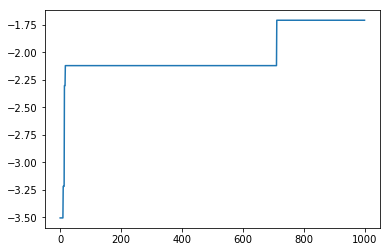

In [254]:
plt.plot(bleus)

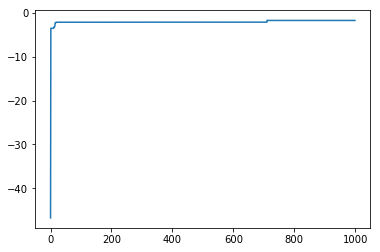

In [255]:
plt.plot(res)

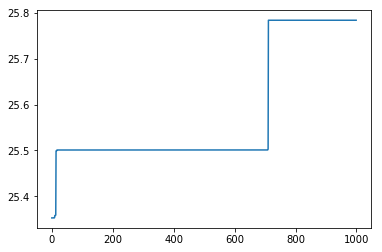

In [256]:
plt.plot(norms)

In [259]:
torch.max(r, dim=1)[1]

Variable containing:
   0
 650
 430
 224
 600
 780
 493
 467
 707
 128
[torch.LongTensor of size 10]

In [260]:
torch.max(t, dim=1)[1]

Variable containing:
 493
 467
 707
 413
 707
 234
 832
 600
 780
 430
[torch.LongTensor of size 10]

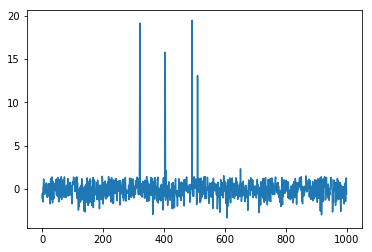

In [222]:
plt.plot(t.data[6].numpy())

In [224]:
bleu(tt, r, f, temp).data[0]

0.72596275806427

In [220]:
tt = deepcopy(t).data

In [223]:
tt[6, 651] = 1e4

In [194]:
tt[1, 806]

10000.0